In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
from sklearn.compose import ColumnTransformer

In [4]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import OneHotEncoder

In [10]:
df=pd.read_excel('student-mat.xlsx')
df.to_csv('student-mat.csv')

In [106]:
df

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,...,4,3,4,1,1,3,6,5,6,6
1,GP,F,17,U,GT3,T,1,1,at_home,other,...,5,3,3,1,1,3,4,5,5,6
2,GP,F,15,U,LE3,T,1,1,at_home,other,...,4,3,2,2,3,3,10,7,8,10
3,GP,F,15,U,GT3,T,4,2,health,services,...,3,2,2,1,1,5,2,15,14,15
4,GP,F,16,U,GT3,T,3,3,other,other,...,4,3,2,1,2,5,4,6,10,10
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
390,MS,M,20,U,LE3,A,2,2,services,services,...,5,5,4,4,5,4,11,9,9,9
391,MS,M,17,U,LE3,T,3,1,services,services,...,2,4,5,3,4,2,3,14,16,16
392,MS,M,21,R,GT3,T,1,1,other,other,...,5,5,3,3,3,3,3,10,8,7
393,MS,M,18,R,LE3,T,3,2,services,other,...,4,4,1,3,4,5,0,11,12,10


<Axes: xlabel='activities', ylabel='G3'>

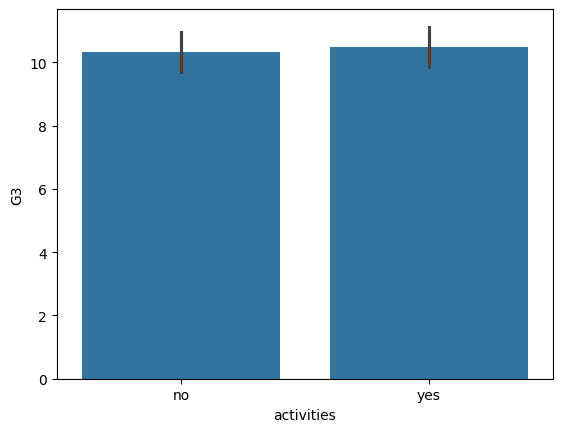

In [96]:
sns.barplot(df,x=df['activities'],y=df['G3'])

In [151]:
cor=df.corr()['G3'].abs().sort_values(ascending=False)
cor

G3                   1.000000
G2                   0.904868
G1                   0.801468
failures             0.360415
Medu                 0.217147
higher_yes           0.182465
age                  0.161579
Fedu                 0.152457
goout                0.132791
romantic_yes         0.129970
traveltime           0.117142
Mjob_health          0.116158
address_U            0.105756
sex_M                0.103456
paid_yes             0.101996
internet_yes         0.098483
studytime            0.097820
Mjob_other           0.096477
reason_reputation    0.095692
Fjob_teacher         0.095374
guardian_other       0.087774
schoolsup_yes        0.082788
famsize_LE3          0.081407
Mjob_services        0.078429
health               0.061335
Pstatus_T            0.058009
Mjob_teacher         0.057712
Fjob_health          0.057111
Dalc                 0.054660
Fjob_other           0.053483
reason_other         0.052008
Walc                 0.051939
nursery_yes          0.051568
famrel    

In [98]:
from sklearn.linear_model import LinearRegression,Ridge,Lasso
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor,ExtraTreesRegressor,GradientBoostingRegressor,AdaBoostRegressor
from sklearn.svm import SVR
from xgboost import XGBRegressor
from sklearn.model_selection import train_test_split

In [107]:
df=pd.get_dummies(df,drop_first=True)

In [113]:
df=df.astype(int)

In [275]:
x=df.drop(['G3','absences','freetime','activities_yes','Fjob_services'],axis=1)
y=df['G3']

In [120]:
from sklearn.metrics import r2_score,mean_absolute_error

In [202]:
lr=LinearRegression()

In [372]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=4)

In [373]:
lr.fit(x_train,y_train)
y_pred=lr.predict(x_test)
print('r2 score',r2_score(y_test,y_pred))
print('msr',mean_absolute_error(y_test,y_pred))

r2 score 0.8773644535436173
msr 1.113232731876566


In [428]:
lasso = Lasso(alpha=0.02).fit(x_train, y_train)
print("Lasso R2:", lasso.score(x_test, y_test))

Lasso R2: 0.8870594744978877


In [400]:
y_pred=lasso.predict(x_test)
print('r2 score',r2_score(y_test,y_pred))
print('msr',mean_absolute_error(y_test,y_pred))

r2 score 0.8870594744978877
msr 1.0123536438723135


In [436]:
import joblib

In [437]:
joblib.dump(lasso,'student-mat.pkl')

['student-mat.pkl']